In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.linear_model import Ridge
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from pandas import DataFrame
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('..\Initial_data\K5T8_3\K5T8_3_cor.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_5292\151386150.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T8_3\K5T8_3_cor.csv', ";")


K5PC5CH.OP  K5PCV5I.PV   K5T4.PV  K5P21.PV  K5T18_2.PV   K5T7.PV  \
0        31.02161    94.96500  114.5010 -279.1992    75.00625  49.41198   
1        31.07828    94.97078  114.4773 -279.1100    74.89687  49.44865   
2        30.82781    94.96719  114.5524 -277.3275    75.06937  49.45531   
3        30.97302    94.96458  114.2618 -278.3367    75.36188  49.49219   
4        30.98516    94.96724  114.1529 -280.1042    75.17396  49.52760   
...           ...         ...       ...       ...         ...       ...   
24475    55.63448    97.66031  138.2167 -535.8150    91.42375  52.28614   
24476    55.54047    97.65448  138.1605 -530.9592    91.44312  52.37698   
24477    55.51609    97.65677  138.2320 -534.3467    91.44583  52.37437   
24478    55.33755    97.66161  138.1123 -530.2617    91.46604  52.34958   
24479    55.48906    97.65781  138.1857 -533.8625    91.44625  52.30479   

       K5P19_2.PV  K5P19_1.PV  K5PC6CH.OP  K5HCV63I.PV  ...  K5T12.PV  \
0       -274.7765   -325.1356    43.14094     99.19063  ...  152.0324   
1       -274.3475   -323.1846    43.14161     99.07547  ...  151.9718   
2       -275.6013   -322.9250    43.13417     99.15958  ...  151.9571   
3       -275.1054   -323.2361    43.16640     99.12093  ...  151.9323   
4       -273.4646   -319.4931    43.16813     99.06464  ...  151.9283   
...           ...         ...         ...          ...  ...       ...   
24475   -207.7773   -271.8371    66.48933     99.82797  ...  176.0842   
24476   -213.1100   -272.8221    66.47859     99.78938  ...  176.0089   
24477   -209.8138   -272.5367    66.46609     99.82796  ...  176.0350   
24478   -213.9127   -277.2914    66.43984     99.81010  ...  176.0854   
24479   -211.8594   -273.4571    66.49412     99.83995  ...  176.1285   

       K5P13.PV  K5HCV60I.PV  K5P16_1.PV  K5GKAL.PV  K5HCV61I.PV  K5P16_2.PV  \
0      3.983025     97.38812    0.532047   15.29541     97.78464    0.604910   
1      3.981728     97.37245    0.527215   15.38140     97.80542    0.609322   
2      3.980113     97.40734    0.533984   15.35248     97.83432    0.608432   
3      3.979872     97.41817    0.531675   15.33855     97.83901    0.609033   
4      3.978566     97.36542    0.548240   15.33628     97.78313    0.604587   
...         ...          ...         ...        ...          ...         ...   
24475  4.067581     97.51240    1.217788   21.52003     97.80813    1.353510   
24476  4.063694     97.50407    1.245809   21.45930     97.82995    1.344710   
24477  4.065034     97.51958    1.232027   21.45812     97.84521    1.346949   
24478  4.068994     97.50943    1.244871   21.49810     97.79406    1.348514   
24479  4.069281     97.50495    1.235343   21.49442     97.81589    1.353297   

       K5FCV4_1I.PV  K5Q2_1.PV  K5P4_1.PV  
0          5.450104   368.9479   10.97927  
1          5.453073   370.0990   11.02042  
2          5.451042   368.3698   10.91922  
3          5.426406   372.7656   10.99307  
4          5.448646   369.5052   10.91474  
...             ...        ...        ...  
24475     30.036820   632.7239   21.92401  
24476     30.069580   637.1042   21.94292  
24477     30.042500   636.3177   21.99427  
24478     30.053280   633.8906   21.88974  
24479     30.042340   636.1614   21.97292  

[24480 rows x 51 columns]

<AxesSubplot:>

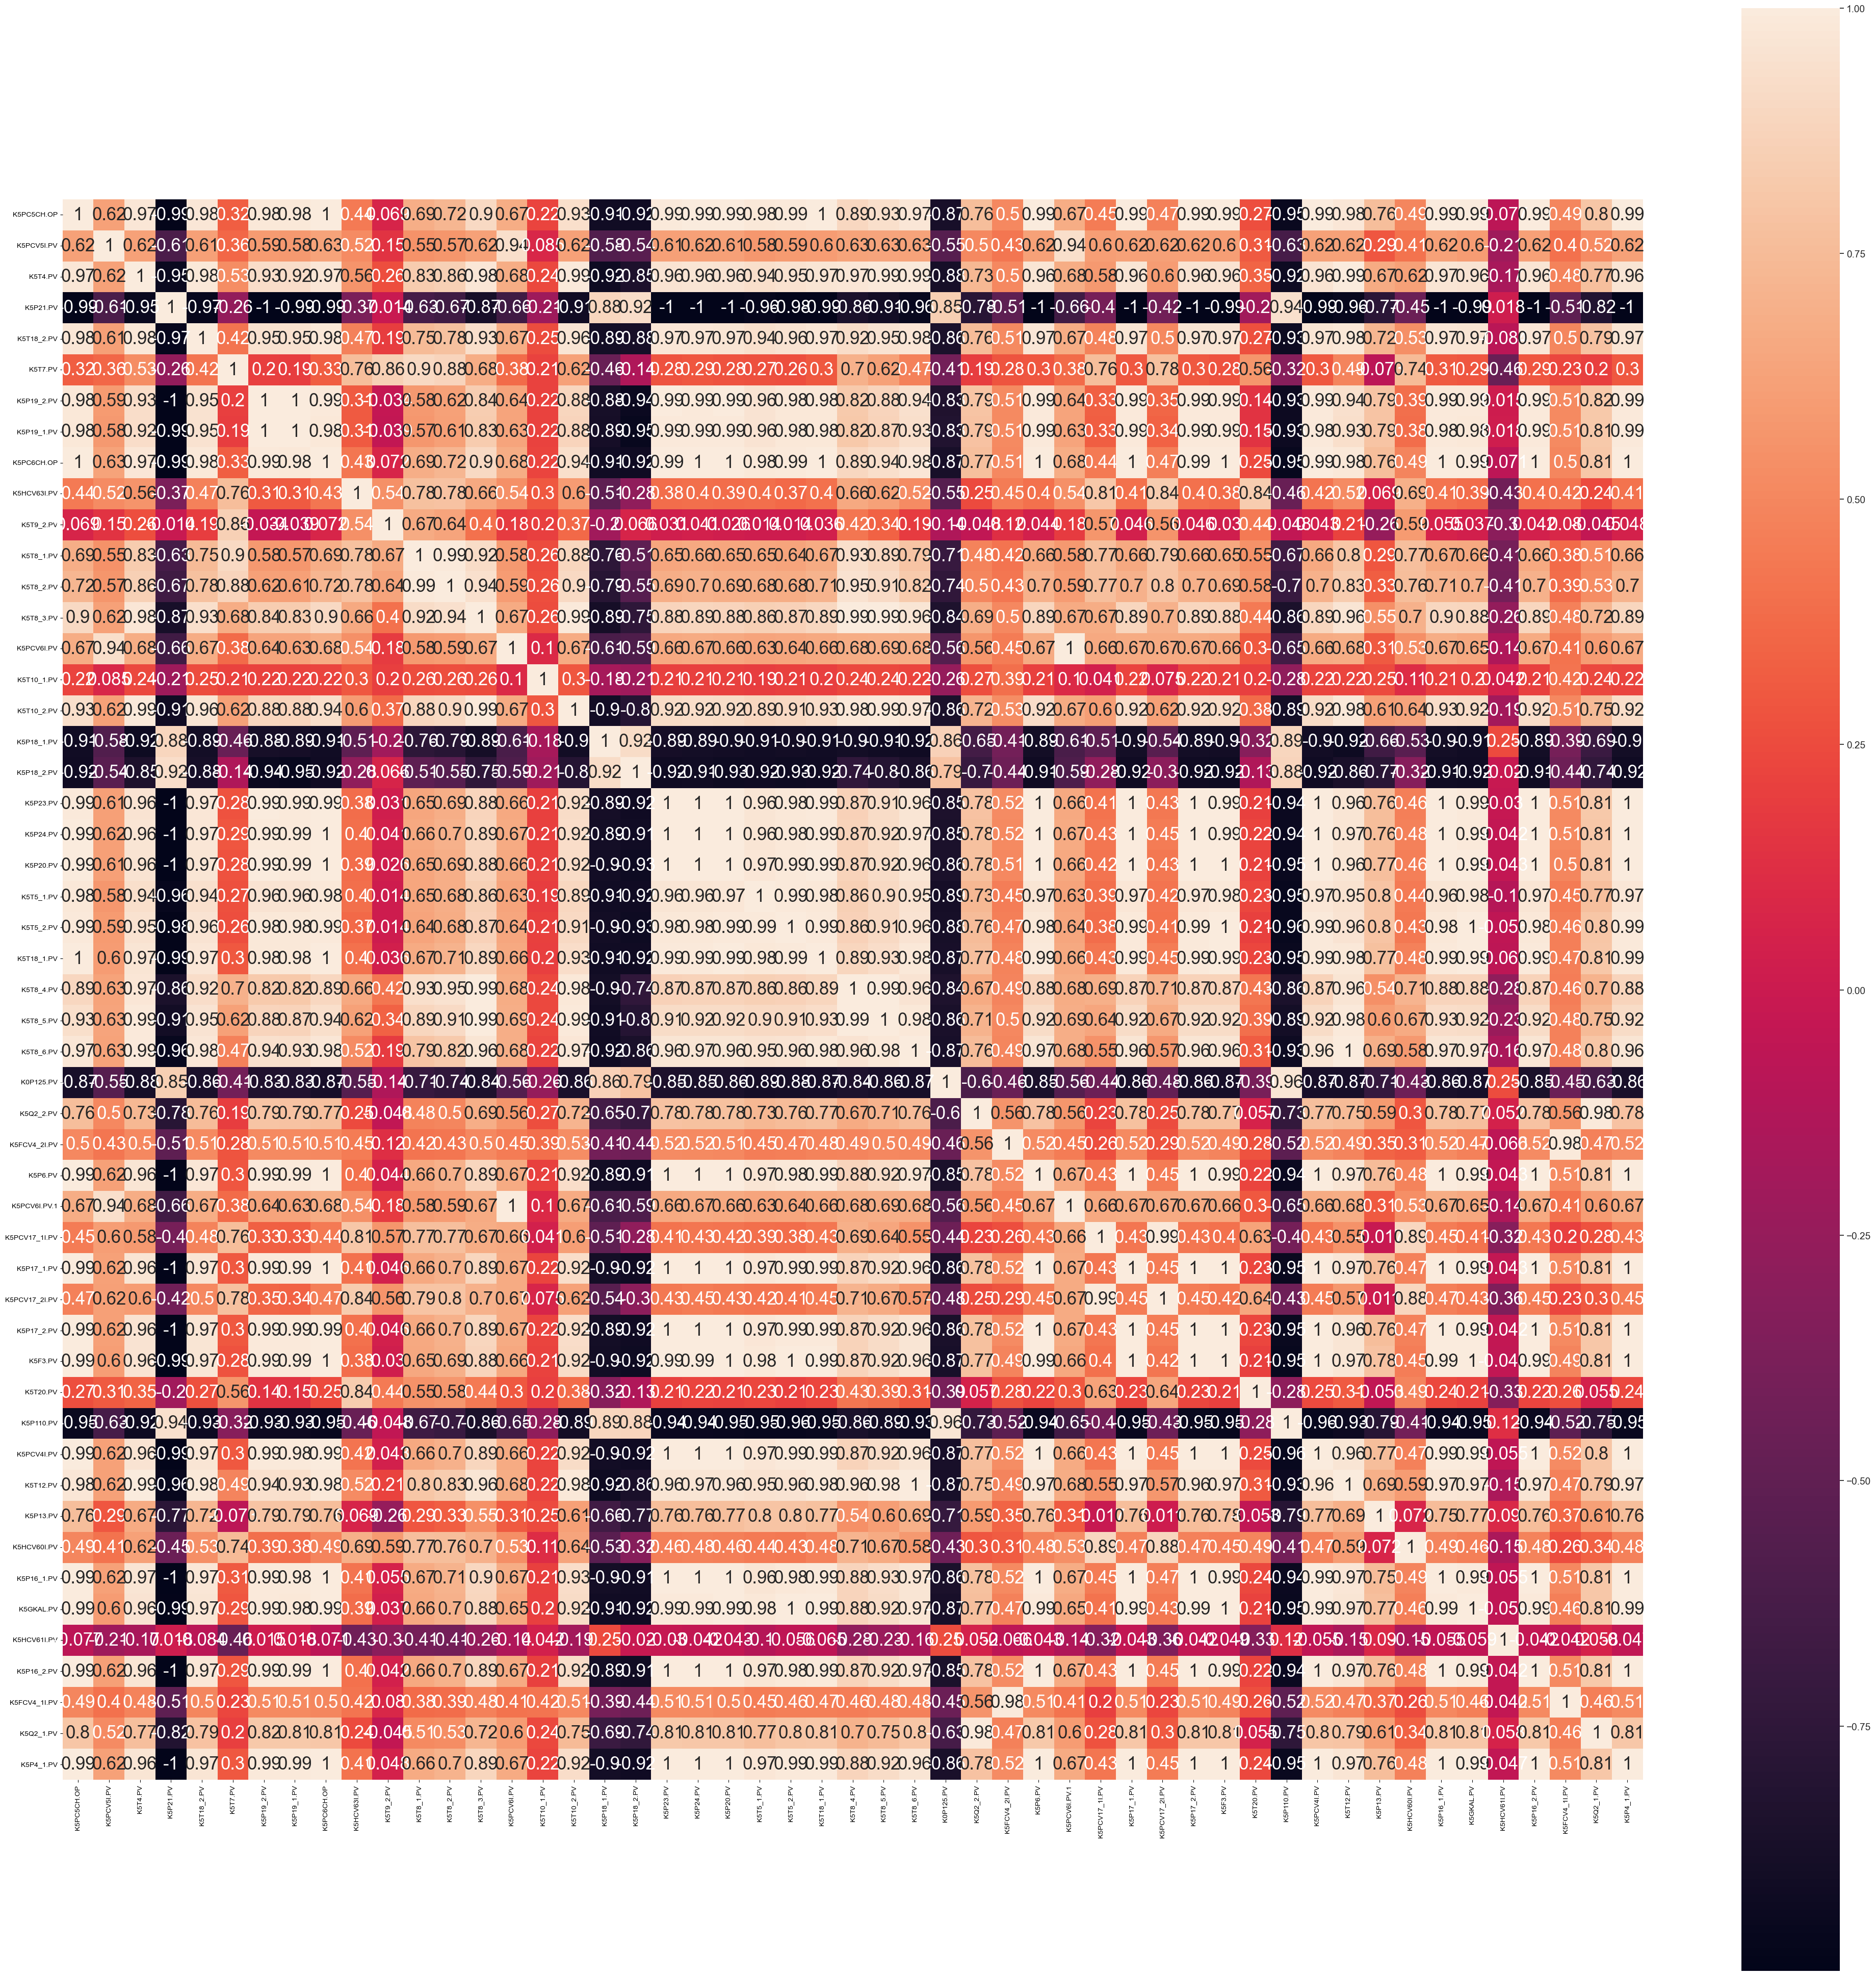

In [4]:
corrmat = df.corr()
fig,ax = plt.subplots(figsize=(50,50))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, annot=True, annot_kws={'size':25}, square=True)

In [5]:
df = pd.read_csv('..\Initial_data\K5T8_3\K5T8_3.csv', ";")
df

C:\Users\User\AppData\Local\Temp\ipykernel_5292\1926936301.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('..\Initial_data\K5T8_3\K5T8_3.csv', ";")


K5PC5CH.OP   K5T4.PV   K5T7.PV  K5PC6CH.OP  K5T8_3.PV
0        31.02161  114.5010  49.41198    43.14094   107.4874
1        31.07828  114.4773  49.44865    43.14161   107.4718
2        30.82781  114.5524  49.45531    43.13417   107.4500
3        30.97302  114.2618  49.49219    43.16640   107.4500
4        30.98516  114.1529   49.5276    43.16813   107.4299
...           ...       ...       ...         ...        ...
24457    55.63448  138.2167  52.28614    66.48933   121.0659
24458    55.54047  138.1605  52.37698    66.47859   121.0600
24459    55.51609  138.2320  52.37437    66.46609   121.0417
24460    55.33755  138.1123  52.34958    66.43984   121.0398
24461    55.48906  138.1857  52.30479    66.49412   121.0263

[24462 rows x 5 columns]

In [6]:
df=df.dropna()
df=df.round(3)
df=df.drop_duplicates(["K5PC5CH.OP"])
df=df.drop_duplicates(["K5T4.PV"])
df=df.drop_duplicates(["K5T7.PV"])
df=df.drop_duplicates(["K5PC6CH.OP"])
df=df.drop_duplicates(["K5T8_3.PV"])
df

K5PC5CH.OP  K5T4.PV   K5T7.PV  K5PC6CH.OP  K5T8_3.PV
0          31.022  114.501  49.41198      43.141    107.487
1          31.078  114.477  49.44865      43.142    107.472
2          30.828  114.552  49.45531      43.134    107.450
4          30.985  114.153   49.5276      43.168    107.430
5          31.021  114.234  49.52844      43.181    107.425
...           ...      ...       ...         ...        ...
24427      55.670  138.084     52.14      66.435    120.810
24428      55.567  138.340  52.11333      66.463    120.854
24431      55.620  138.323  52.07875      66.516    120.913
24435      55.649  138.402  52.12188      66.460    120.939
24452      55.645  138.267  52.22854      66.447    121.075

[5792 rows x 5 columns]

In [7]:
y = df.drop(['K5PC5CH.OP', 'K5T4.PV', "K5T7.PV", "K5PC6CH.OP"], axis=1)
x = df.drop(['K5T8_3.PV'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 25)

In [8]:
lasso = MultiTaskLassoCV(cv=5, random_state=10).fit(X_train, y_train)
lasso.score(x, y)
clf = Ridge(alpha=0.5)
clf.fit(x, y)
clf.score(X_test, y_test)

0.9840560430146286

In [9]:
import pickle
filename = '../model/K5T8_3.sav'
pickle.dump(clf, open(filename, 'wb'))

In [10]:
loaded_model = pickle.load(open("../model/K5T8_3.sav", 'rb'))

In [11]:
task2 = {'K5PC5CH.OP':[25.9],
        'K5T4.PV':[98],
        'K5T7.PV':[25],
        'K5PC6CH.OP':[38]}
df2 = pd.DataFrame(data=task2)
df2

K5PC5CH.OP  K5T4.PV  K5T7.PV  K5PC6CH.OP
0        25.9       98       25          38

In [12]:
loaded_model.predict(df2)

array([[91.70261367]])